### Using all 8 stations with a P record from 2005-2016: 
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Remove days with P < 0.1 mm
### Plot histograms and best fit probability distributions for wet days

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import gamma
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in precip data for all stations

### Fisera Ridge 2325 m, Upper Clearing 1845 m, Hay Meadow 1436 m

In [2]:
# Use pd.read_csv to read csv file
# Fisera Ridge
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)
# Upper Clearing
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)
# Hay Meadow
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)
# drop P values less than 1.0mm
FRP_df = FRP_df.drop(FRP_df[FRP_df.FR_p_mm < 0.1].index)
UCP_df = UCP_df.drop(UCP_df[UCP_df.UC_p_mm < 0.1].index)
HMP_df = HMP_df.drop(HMP_df[HMP_df.HM_p_mm < 0.1].index)

### Kananaskis 1391.1 m

In [3]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KP_df.drop(KP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KP_df = KP_df.drop(KP_df[KP_df.K_p_mm < 0.1].index)

### Bow Valley 1297.5 m

In [4]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVP_df.drop(BVP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BVP_df = BVP_df.drop(BVP_df[BVP_df.BV_p_mm < 0.1].index)

### Kananaskis Pocaterra 1610.0 m

In [5]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPP_df.drop(KPP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
KPP_df = KPP_df.drop(KPP_df[KPP_df.KP_p_mm < 0.1].index)

### Banff CS 1396.9 m

In [6]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSP_df.drop(BCSP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
BCSP_df = BCSP_df.drop(BCSP_df[BCSP_df.BCS_p_mm < 0.1].index)

### Wildcat Hills 1268.0 m

In [7]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHP_df.drop(WHP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# drop P values less than 1.0mm
WHP_df = WHP_df.drop(WHP_df[WHP_df.WH_p_mm < 0.1].index)

In [8]:
# check how many wet days there are at each station (from highest elev to lowest)
print("FR wet days (2325 m) =", len(FRP_df))
print("UC wet days (1845 m) =", len(UCP_df))
print("KP wet days (1610 m) =", len(KPP_df))
print("HM wet days (1436 m) =", len(HMP_df))
print("BCS wet days (1397 m) =", len(BCSP_df))
print("K wet days (1391 m) =", len(KP_df))
print("BV wet days (1298 m) =", len(BVP_df))
print("WH wet days (1268 m) =", len(WHP_df))

FR wet days (2325 m) = 2243
UC wet days (1845 m) = 1925
KP wet days (1610 m) = 786
HM wet days (1436 m) = 1551
BCS wet days (1397 m) = 1808
K wet days (1391 m) = 1298
BV wet days (1298 m) = 1543
WH wet days (1268 m) = 1195


### Plot histogram and probability distributions for wet days at each station in descending order of elevation

### Fisera Ridge 2325 m

Text(0.5, 1.0, 'Fisera Ridge 2325 m (dry day threshold = 0.1 mm)')

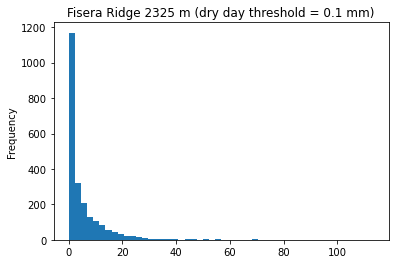

In [9]:
FRP_df.FR_p_mm.plot(kind='hist', bins=50)
plt.title('Fisera Ridge 2325 m (dry day threshold = 0.1 mm)')

gamma: (0.13926623589309967, 0.10000000000000851, 2.678971022724406)
exponential: (0.10000000000000853, 5.154997592510022)


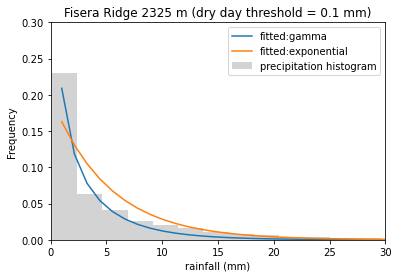

In [10]:
# fit distributions
x = np.linspace(1, max(FRP_df.FR_p_mm), 100)
y = FRP_df.FR_p_mm
FRP_df.FR_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Fisera Ridge 2325 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\FRprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
FRParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\FRPx_values.csv", FRParr, delimiter="\t")

### Upper Clearing 1845 m

Text(0.5, 1.0, 'Upper Clearing 1845 m (dry day threshold = 0.1 mm)')

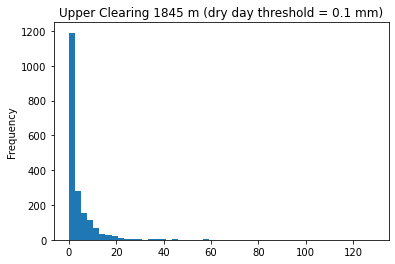

In [11]:
UCP_df.UC_p_mm.plot(kind='hist', bins=50)
plt.title('Upper Clearing 1845 m (dry day threshold = 0.1 mm)')

gamma: (0.09671705741537748, 0.10000000000000141, 2.2867484539565135)
exponential: (0.10000000000000142, 3.888373350649349)


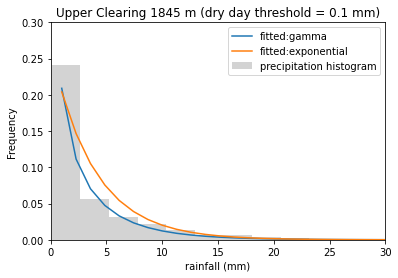

In [12]:
# fit distributions
x = np.linspace(1, max(UCP_df.UC_p_mm), 100)
y = UCP_df.UC_p_mm
UCP_df.UC_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Upper Clearing 1845 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\UCprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
UCParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\UCPx_values.csv", UCParr, delimiter="\t")

### Kananskis Pocaterra 1610 m, 653 wet days

Text(0.5, 1.0, 'Kananskis Pocaterra 1610 m (dry day threshold = 0.1 mm)')

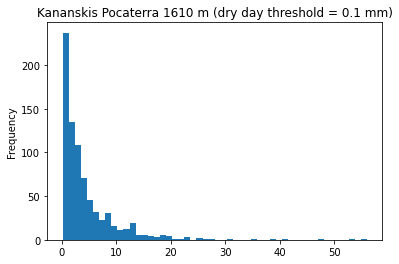

In [13]:
KPP_df.KP_p_mm.plot(kind='hist', bins=50)
plt.title('Kananskis Pocaterra 1610 m (dry day threshold = 0.1 mm)')

gamma: (0.6345970325231531, 0.09999999999999999, 6.653698035441875)
exponential: (0.1, 4.358524173027989)


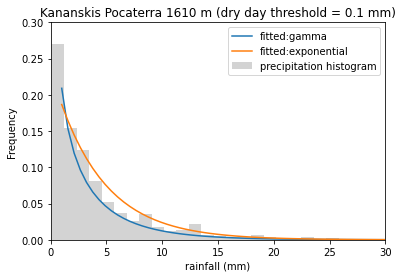

In [14]:
# fit distributions
x = np.linspace(1, max(KPP_df.KP_p_mm), 100)
y = KPP_df.KP_p_mm
KPP_df.KP_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananskis Pocaterra 1610 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\KPprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
KPParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\KPPx_values.csv", KPParr, delimiter="\t")

### Hay Meadow 1436 m, 916 wet days

Text(0.5, 1.0, 'Hay Meadow 1436 m (dry day threshold = 0.1 mm)')

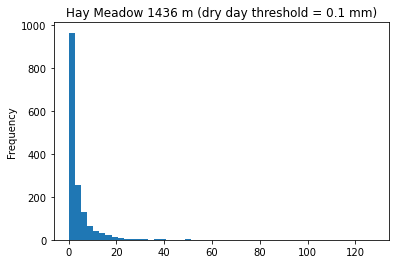

In [15]:
HMP_df.HM_p_mm.plot(kind='hist', bins=50)
plt.title('Hay Meadow 1436 m (dry day threshold = 0.1 mm)')

gamma: (0.06717254641152898, 0.10000000000000096, 2.5625291398451076)
exponential: (0.10000000000000098, 3.7538444874274655)


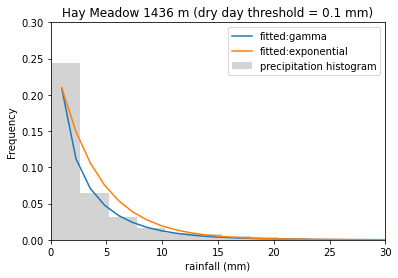

In [16]:
# fit distributions
x = np.linspace(1, max(HMP_df.HM_p_mm), 100)
y = HMP_df.HM_p_mm
HMP_df.HM_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Hay Meadow 1436 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\HMprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
HMParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\HMPx_values.csv", HMParr, delimiter="\t")

### Banff CS 1397 m, 980 wet days

Text(0.5, 1.0, 'Banff CS 1397 m (dry day threshold = 0.1 mm)')

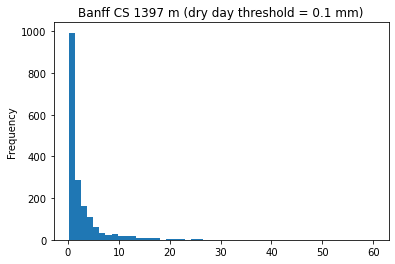

In [17]:
BCSP_df.BCS_p_mm.plot(kind='hist', bins=50)
plt.title('Banff CS 1397 m (dry day threshold = 0.1 mm)')

gamma: (0.279704469410467, 0.19999999999999998, 1.5606155478668664)
exponential: (0.2, 2.452267699115044)


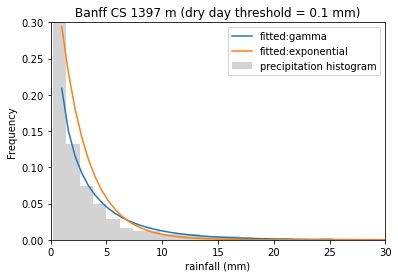

In [18]:
# fit distributions
x = np.linspace(1, max(BCSP_df.BCS_p_mm), 100)
y = BCSP_df.BCS_p_mm
BCSP_df.BCS_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Banff CS 1397 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BCSprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
BCSParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\BCSPx_values.csv", BCSParr, delimiter="\t")

### Kananaskis 1391 m, 1027 wet days

Text(0.5, 1.0, 'Kananaskis 1391 m (dry day threshold = 0.1 mm)')

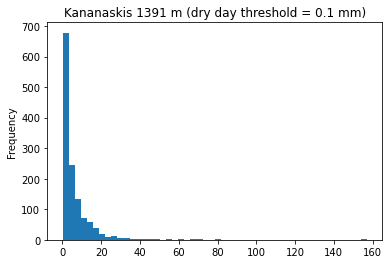

In [19]:
KP_df.K_p_mm.plot(kind='hist', bins=50)
plt.title('Kananaskis 1391 m (dry day threshold = 0.1 mm)')

gamma: (0.07993883576449737, 0.09999999999999999, 2.8540823785327047)
exponential: (0.1, 5.861171032357473)


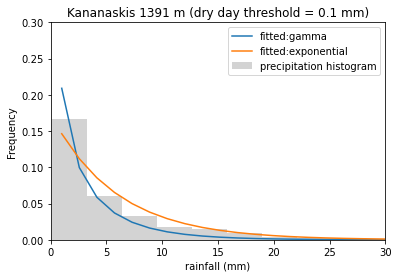

In [20]:
# fit distributions
x = np.linspace(1, max(KP_df.K_p_mm), 100)
y = KP_df.K_p_mm
KP_df.K_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Kananaskis 1391 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\Kprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
KParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\KPx_values.csv", KParr, delimiter="\t")

### Bow Valley 1298 m, 947 wet days

Text(0.5, 1.0, 'Bow Valley 1298 m (dry day threshold = 0.1 mm)')

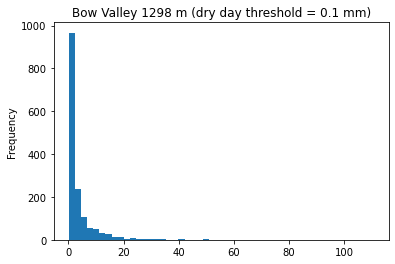

In [21]:
BVP_df.BV_p_mm.plot(kind='hist', bins=50)
plt.title('Bow Valley 1298 m (dry day threshold = 0.1 mm)')

gamma: (0.15735973483894822, 0.19999999999999998, 1.5696791667387977)
exponential: (0.2, 3.665975372650681)


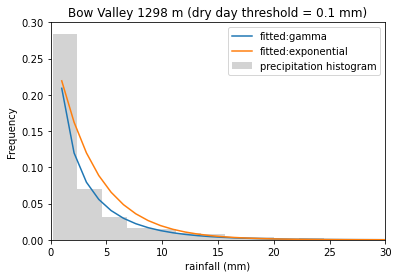

In [22]:
# fit distributions
x = np.linspace(1, max(BVP_df.BV_p_mm), 100)
y = BVP_df.BV_p_mm
BVP_df.BV_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Bow Valley 1298 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\BVprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
BVParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\BVPx_values.csv", BVParr, delimiter="\t")

### Wildcat Hills 1268 m, 919 wet days

Text(0.5, 1.0, 'Wildcat Hills 1268 m (dry day threshold = 0.1 mm)')

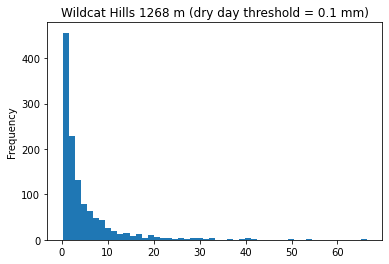

In [23]:
WHP_df.WH_p_mm.plot(kind='hist', bins=50)
plt.title('Wildcat Hills 1268 m (dry day threshold = 0.1 mm)')

gamma: (0.4126667267956309, 0.19999999999999998, 1.5637202330644624)
exponential: (0.2, 4.353221757322176)


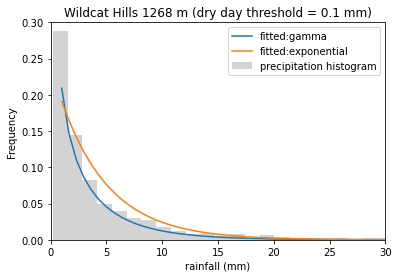

In [24]:
# fit distributions
x = np.linspace(1, max(WHP_df.WH_p_mm), 100)
y = WHP_df.WH_p_mm
WHP_df.WH_p_mm.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')
# gamma
param = scipy.stats.gamma.fit(y)
print("gamma:", param)
pdf_fitted = scipy.stats.gamma.pdf(x, a=0.55, scale=5.0) # a is shape param
plt.plot(x, pdf_fitted, label='fitted:gamma')
# expon
param = scipy.stats.expon.fit(y)
print("exponential:", param)
pdf_fitted = scipy.stats.expon.pdf(x, param[0], param[1])
plt.plot(x, pdf_fitted, label='fitted:exponential')
# plot
plt.xlabel('rainfall (mm)')
plt.xlim(0, 30)
plt.ylim(0, 0.3)
plt.legend()
plt.title('Wildcat Hills 1268 m (dry day threshold = 0.1 mm)')
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\probdist_plots_0pt1mm_thresh\WHprob_0pt1mm.png')
# create a numpy array of x values for run_inv.py to generate probability distributions
WHParr = np.array(x)
# save array to a csv file
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\WHPx_values.csv", WHParr, delimiter="\t")

### Take a look at the np arrays of x values for each station

In [25]:
# FRParr

In [26]:
# UCParr

In [27]:
# HMParr

In [28]:
# KParr

In [29]:
# BVParr

### Make a dataframe of each array then concatenate them and write to a csv file

In [33]:
# create dfs
FRPx_df = pd.DataFrame(FRParr, columns = ["FRPxvals"])
UCPx_df = pd.DataFrame(UCParr, columns = ["UCPxvals"])
HMPx_df = pd.DataFrame(HMParr, columns = ["HMPxvals"])
KPx_df = pd.DataFrame(KParr, columns = ["KxPvals"])
BVPx_df = pd.DataFrame(BVParr, columns = ["BVPxvals"])
# transpose dfs to get the right format for input to run_inv.py
FRPx_df = FRPx_df.T
UCPx_df = UCPx_df.T
HMPx_df = HMPx_df.T
KPx_df = KPx_df.T
BVPx_df = BVPx_df.T
# concatenate them
Pxvals_df = pd.concat([FRPx_df, UCPx_df, HMPx_df, KPx_df, BVPx_df], axis=0)
# Pxvals_df
# # write to csv
Pxvals_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\all_stations_20km\input_data\Pxvals_for_Pdistns.csv", sep="\t", index=False, header=False)